# The use of GenAI in the Games Industry
### - Analyzing and visualizing our survey data


## Setup
First we import needed libraries and our data from a .xlsx file.


In [1]:
# package for data manipulation including ggplot2
library(tidyverse)

# package for reading excel files
library(readxl)

# read the excel file
data <- read_excel("surveyData20240406.xlsx")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## What is the data?
Now let's count the rows (number of respondents) and list the collumns (questions).

In [2]:
# count the number of rows and columns
dim(data)

# list the column names
names(data)

[1] 251  56

[1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Do you consider yourself a professional or a hobbyist in game development?"                               
 [5] "Primary area of work?"                                                                                    
 [6] "Years of experience in game development?"                                                                 
 [7] "Are you in a lead role?"                                                                                  
 [8] "Team size?"                                                                                               
 [9] "Column1"                                                                                                  
[10] "Statement 2"                                                                                              
[11] "Question3"                                                                                                
[12] "Overall stance on Generative AI?"                                                                         
[13] "Column2"                                                                                                  
[14] "Statement 22"                                                                                             
[15] "Which areas do you think are less<U+00A0>"                                                                
[16] "Art & Assets"                                                                                             
[17] "Level Design"                                                                                             
[18] "Storytelling"                                                                                             
[19] "Sound Design"                                                                                             
[20] "Voice Overs & Acting"                                                                                     
[21] "Programming"                                                                                              
[22] "Game Design"                                                                                              
[23] "Marketing & PR"                                                                                           
[24] "Music"                                                                                                    
[25] "Community management"                                                                                     
[26] "Initial prototyping"                                                                                      
[27] "Do you use Generative AI in your work?"                                                                   
[28] "Was it your own idea to begin using Generative AI or your employers?"                                     
[29] "Efficiency?"                                                                                              
[30] "Quality?"                                                                                                 
[31] "Enjoyment?"                                                                                               
[32] "Do you think of the ability to use Generative AI as an actual and useful competence in your area of work?"
[33] "Do your coworkers use Generative AI in their work?"                                                       
[34] "Do your peers in the industry use Generative AI in their work?"                                           
[35] "Do you disclose your use of Generative AI internally?"                                                    
[36] "Do you disclose your use of Generative A

## Proffesionals vs Hobbyists
Now let's compare the proffesionals and the hobbyists.

### Distribution

Do you consider yourself a professional or a hobbyist in game development?,n,percentage
<chr>,<int>,<dbl>
Hobbyist,158,62.94821
Professional,93,37.05179


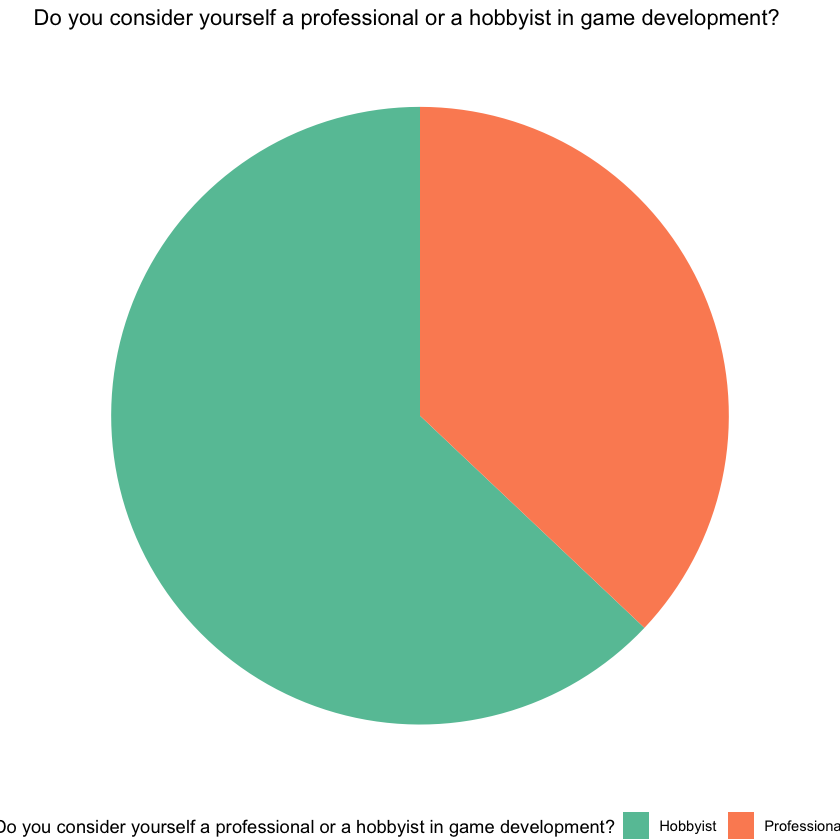

In [3]:
# Show the percentage of Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  ggplot(aes(x = "", y = n, fill = `Do you consider yourself a professional or a hobbyist in game development?`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")


### Do they use GenAi?

Do you use Generative AI in your work?,n,percentage
<chr>,<int>,<dbl>
No,155,61.75299
Yes,96,38.24701


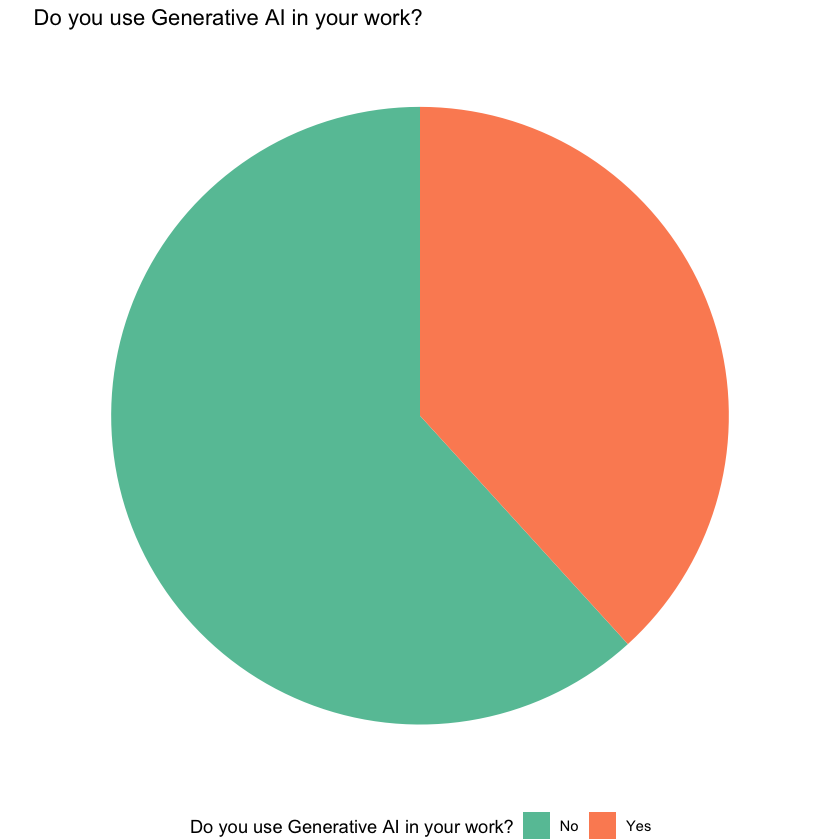

In [4]:
# Show the percentage of Do you use Generative AI in ypur work?
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  ggplot(aes(x = "", y = n, fill = `Do you use Generative AI in your work?`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you use Generative AI in your work?") +
  scale_fill_brewer(palette = "Set2")

Do you consider yourself a professional or a hobbyist in game development?,Do you use Generative AI in your work?,n,percentage
<chr>,<chr>,<int>,<dbl>
Hobbyist,No,102,64.55696
Hobbyist,Yes,56,35.44304
Professional,No,53,56.98925
Professional,Yes,40,43.01075


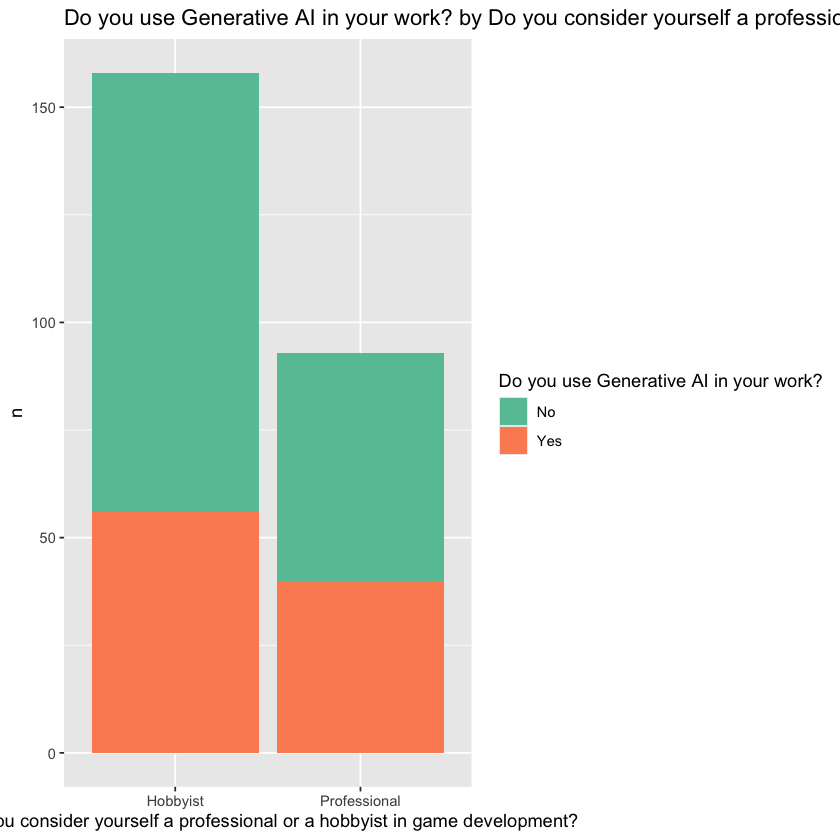

In [5]:
# Make a stacked bar chart of Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`, `Do you use Generative AI in your work?`) %>%
  ggplot(aes(x = `Do you consider yourself a professional or a hobbyist in game development?`, y = n, fill = `Do you use Generative AI in your work?`)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")

# Show the percentage of Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`, `Do you use Generative AI in your work?`) %>%
  group_by(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)